# Gerando KDE para dataset do artigo: Automated Feature Selection with Local Gradient Trajectory in Split Learning

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load realm dataset
dataset_raw = pd.read_csv('datasets/realm-cnsm2015/periodic-load/Y.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)

print(dataset_raw.shape)
dataset_raw.head(5)

# incluindo coluna referente ao label
median_avg_inter_disp_delay = dataset_raw['AvgInterDispDelay'].mean()

print(f"The median of 'col1' is: {median_avg_inter_disp_delay}")

dataset_raw['Label'] = 0
dataset_raw.loc[dataset_raw['AvgInterDispDelay'] >= median_avg_inter_disp_delay, 'Label'] = 1

print(dataset_raw.shape)
dataset_raw.head(5)

dataset_raw.to_csv('datasets/realm-cnsm2015-periodic.csv', columns=['AvgInterDispDelay', 'Label'], index=False)

(50000, 11)
The median of 'col1' is: 0.05375376753658853
(50000, 12)


In [3]:
# Load realm dataset
dataset_raw_flash = pd.read_csv('datasets/realm-cnsm2015/flashcrowd-load/Y.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)

print(dataset_raw_flash.shape)
dataset_raw_flash.head(5)

# incluindo coluna referente ao label
median_avg_inter_disp_delay = dataset_raw_flash['AvgInterDispDelay'].mean()

print(f"The median of 'col1' is: {median_avg_inter_disp_delay}")

dataset_raw_flash['Label'] = 0
dataset_raw_flash.loc[dataset_raw_flash['AvgInterDispDelay'] >= median_avg_inter_disp_delay, 'Label'] = 1

print(dataset_raw_flash.shape)
dataset_raw_flash.head(5)

dataset_raw_flash.to_csv('datasets/realm-cnsm2015-flash.csv', columns=['AvgInterDispDelay', 'Label'], index=False)

(50000, 11)
The median of 'col1' is: 0.05136579532625134
(50000, 12)


In [10]:
# incluindo coluna referente ao label
median_avg_inter_disp_delay = dataset_raw['AvgInterDispDelay'].mean()

print(f"The median of 'col1' is: {median_avg_inter_disp_delay}")

dataset_raw['Label'] = 0
dataset_raw.loc[dataset_raw['AvgInterDispDelay'] >= median_avg_inter_disp_delay, 'Label'] = 1

print(dataset_raw.shape)
dataset_raw.head(5)

dataset_raw_waterloo.to_csv('datasets/realm-cnsm2015.csv', columns=['AvgInterDispDelay', 'Label'], index=False)

The median of 'col1' is: 0.05375376753658853
(50000, 12)


,TimeStamp,LostFrames,noAudioPlayed,avgInterAudioPlayedDelay,NetReadOperations,NetReadBytes,NetReadAvgDelay,noAudioLost,noAudioLate,DispFrames,AvgInterDispDelay,Label
0,1424473239,0,43,0.023461,205,129704,0.004918,0,0,24,0.041801,0
1,1424473240,0,42,0.024560,185,113496,0.005319,0,0,24,0.041717,0
2,1424473241,0,42,0.024009,167,113480,0.006036,0,0,24,0.041702,0
3,1424473242,0,43,0.023456,175,105392,0.005759,0,0,24,0.041700,0
4,1424473243,0,37,0.024638,155,89184,0.006349,0,0,24,0.041728,0


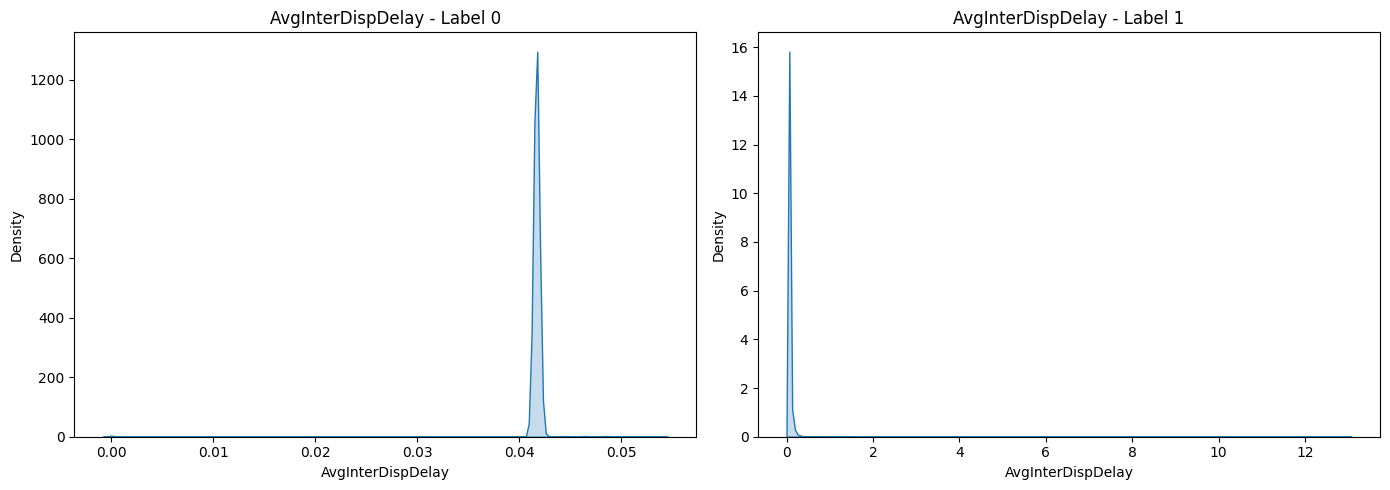

In [31]:
# kde para cada um dos labels...
dataset_raw_label0 = dataset_raw[dataset_raw['Label'] == 0]
dataset_raw_label1 = dataset_raw[dataset_raw['Label'] == 1]

# snapshot_min
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.kdeplot(dataset_raw_label0['AvgInterDispDelay'],fill=True, ax=axes[0])
axes[0].set_title("AvgInterDispDelay - Label 0")

sns.kdeplot(dataset_raw_label1['AvgInterDispDelay'],fill=True, ax=axes[1])
axes[1].set_title("AvgInterDispDelay - Label 1")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/realm_waterloo', 'label0_label1_kde.png'))
plt.show()

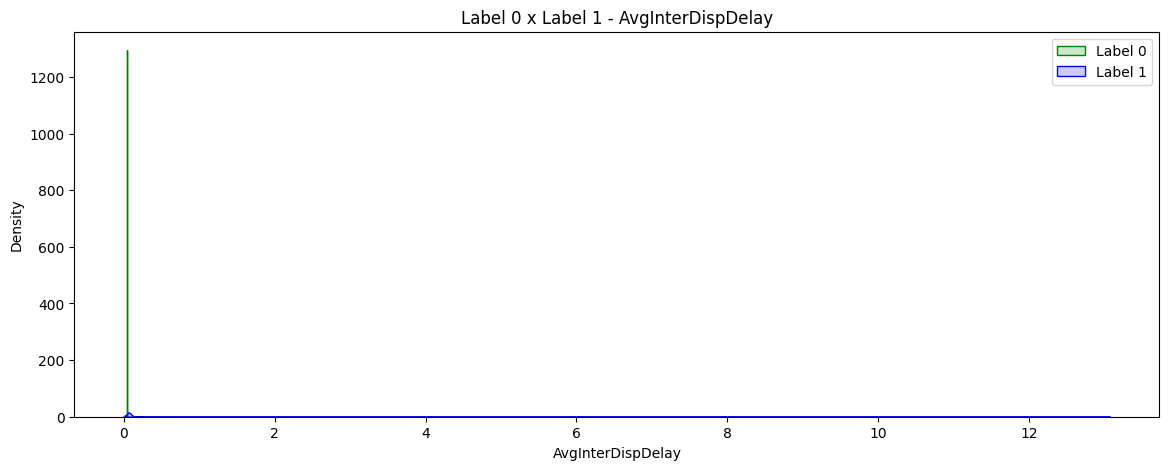

In [32]:
# kde comparativo dos labels...
fig, axes = plt.subplots(1, 1, figsize=(14, 5))
sns.kdeplot(dataset_raw_label0['AvgInterDispDelay'], color='green', fill=True, label='Label 0', alpha=.2, ax=axes)
sns.kdeplot(dataset_raw_label1['AvgInterDispDelay'], color='b', fill=True, label='Label 1', alpha=.2, ax=axes)
axes.set_title("Label 0 x Label 1 - AvgInterDispDelay")
# axes.set_xlim(-0.5, 15)
# axes.set_ylim(-0.5, 50)
axes.legend()

plt.savefig(os.path.join('images/realm_waterloo', 'label0_label1_comparison.png'))
plt.show()

# Gerando KDE para dataset do artigo: QoE Modeling on Split Features with Distributed Deep Learning

In [4]:
# Load waterloo dataset
dataset_raw_waterloo = pd.read_csv('datasets/waterloo_sqoe3_full/data.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)

print(dataset_raw_waterloo.shape)
dataset_raw_waterloo.head(5)

dataset_raw_waterloo.to_csv('datasets/waterloo_mos.csv', columns=['mos'], index=False)

(450, 5)


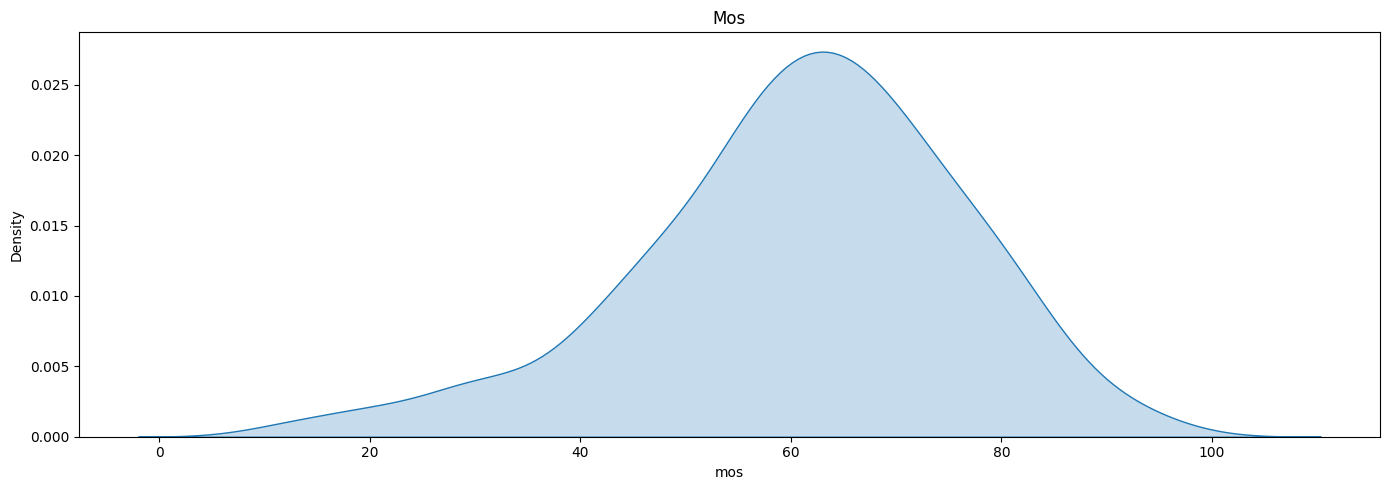

In [33]:
# kde para mos (target variable).
fig, axes = plt.subplots(1, 1, figsize=(14, 5))
sns.kdeplot(dataset_raw_waterloo['mos'],fill=True, ax=axes)
axes.set_title("Mos")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/realm_waterloo', 'waterloo_mos_kde.png'))
plt.show()